In [2]:
import sys
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from scipy.signal import hilbert, chirp
from tqdm import tqdm
pi=3.14
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.iolib.table import SimpleTable
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
from matplotlib import pyplot
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
from math import sin
from math import radians
from numpy import pi
from numpy import sin,cos
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import integrate
import scipy.fftpack as fourier

import threading,time
import multiprocessing
import pylab
#from rtlsdr import RtlSdr
from numpy import mean
from numpy import power
from numpy.fft import fft
from numpy.fft import fftshift
from numpy.fft import ifft
from numpy.fft import ifftshift
#import bitarray
from  scipy.io.wavfile import read as wavread


%matplotlib inline

In [3]:
def f_ex(data):
    fit = SimpleExpSmoothing(data).fit(smoothing_level=0.6,optimized=False)
    fcast = fit.forecast(3)
    return fit.fittedvalues

In [4]:
"""
Авторегрессия
"""
def f_AR(data):
    model = AutoReg(data, lags=24)
    model_fit = model.fit()    
    #predictions = model_fit.predict(start=len(data), end=len(data)+len(data)-1, dynamic=False)
    predictions = model_fit.predict()
    #plt.plot(predictions, label="SinAR")
    return predictions

In [5]:
def f_ARMA(data, p, q):
    model = sm.tsa.ARMA(data, order=(p,q))
    fit = model.fit()
    res=fit.predict()
    return res
    #plt.plot(res, label="AmpARMA")

In [6]:
"""
Создание синусоиды 
"""
def createSin(k):
    nsample = 1000 #length
    ## simulate a simple sinusoidal function
    x1 = np.linspace(0, pi*k, nsample)
    ysin=np.sin(x1) 
    return x1, ysin
    #fig, ax = plt.subplots()
    #ax.plot(x1, ysin, label="Data")

In [7]:
"""
Создание Амплитудной модуляции
""" 
def createAmp(frequency, leng):
    duration = frequency #частота
    fs = leng #length
    samples = int(fs*duration) 
    t = np.arange(samples) / fs #шаг
    signal = chirp(t, 20.0, t[-1], 100.0)
    signal *= (1.0 + 0.5 * np.cos(2.0*np.pi*3.0*t) )
    #fig = plt.figure(figsize=(12,3))
    #plt.plot(t, signal, label='signal')
    return t,signal

In [8]:
# создание Фазовой модуляции
def createFreq(leng):
    modulator_frequency = 4.0 #частота
    carrier_frequency = 40.0
    modulation_index = 1.0
    leng=leng*1.0
    time = np.arange(leng) / leng# 1000.0
    modulator = np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
    carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
    product = np.zeros_like(modulator)

    for i, t in enumerate(time):
        product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))
    return product

## Создание графиков

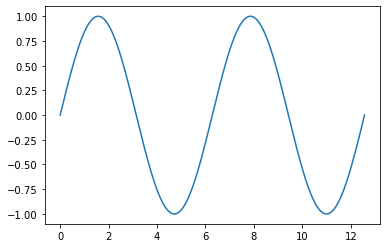

In [9]:
xsin, ysin=createSin(4)
plt.plot(xsin, ysin, label="Data")

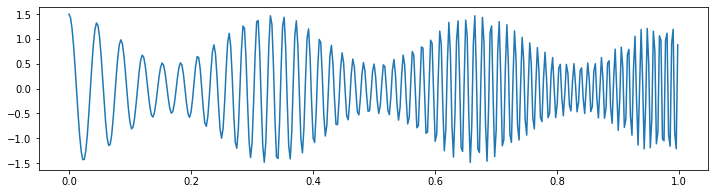

In [10]:
fig = plt.figure(figsize=(12,3))
xAmp, yAmp=createAmp(1, 400)
plt.plot(xAmp, yAmp, label='signal')

1000

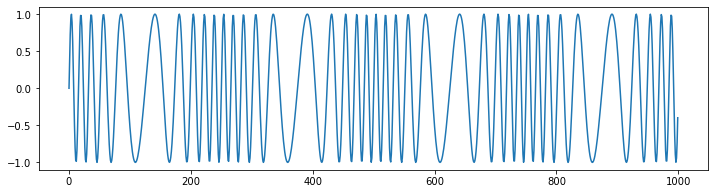

In [11]:
fig = plt.figure(figsize=(12,3))
yFreq=createFreq(1000)
plt.plot(yFreq)
len(yFreq)

## прогонка через функции

In [12]:
def LengArr(k,data):
    time = k*np.arange(len(data)) / len(data)
    return time

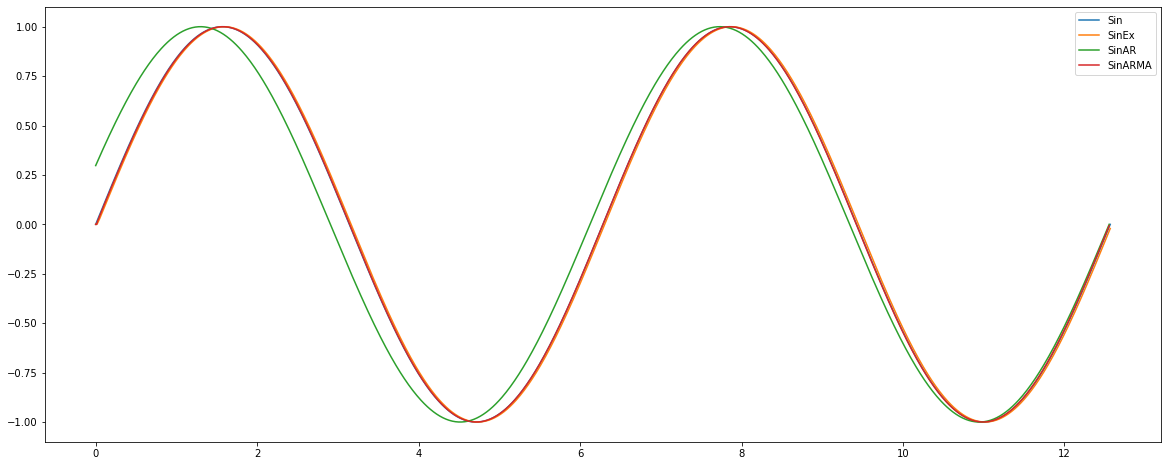

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(xsin, ysin, label="Sin")#+
plt.plot(xsin, f_ex(ysin), label="SinEx")#+
plt.plot(LengArr(pi*4,f_AR(ysin)), f_AR(ysin), label="SinAR")
plt.plot(LengArr(pi*4,f_ARMA(ysin, 1,1)), f_ARMA(ysin, 1, 1), label="SinARMA")#+
plt.legend()

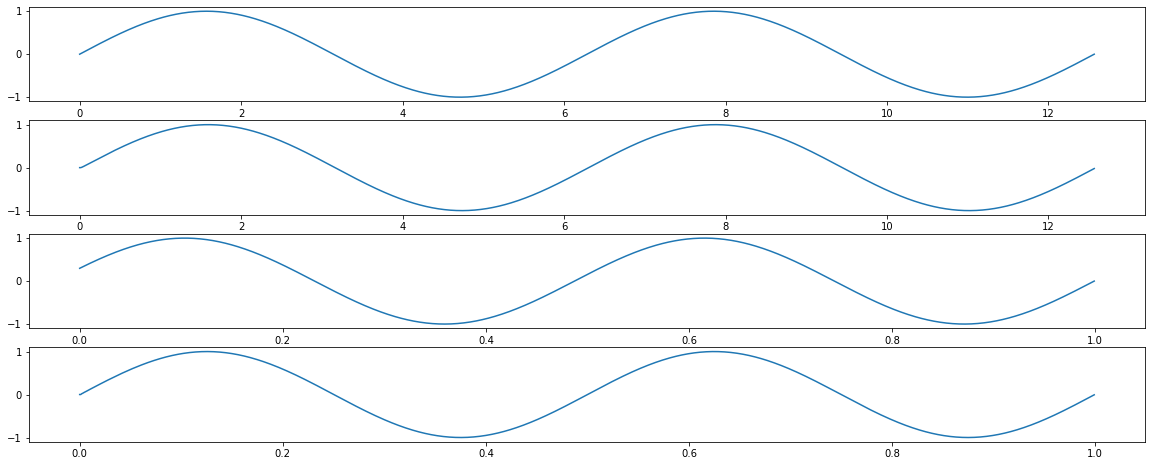

In [35]:
plt.figure(figsize=(20, 8))
plt.subplot(4, 1, 1)
plt.plot(xsin, ysin, label="Sin")
plt.subplot(4, 1, 2)
plt.plot(xsin, f_ex(ysin), label="SinEx")
plt.subplot(4, 1, 3)
plt.plot(LengArr(1,f_AR(ysin)), f_AR(ysin), label="SinAR")
plt.subplot(4, 1, 4)
plt.plot(LengArr(1,f_ARMA(ysin, 1,1)), f_ARMA(ysin, 1, 1), label="SinARMA")

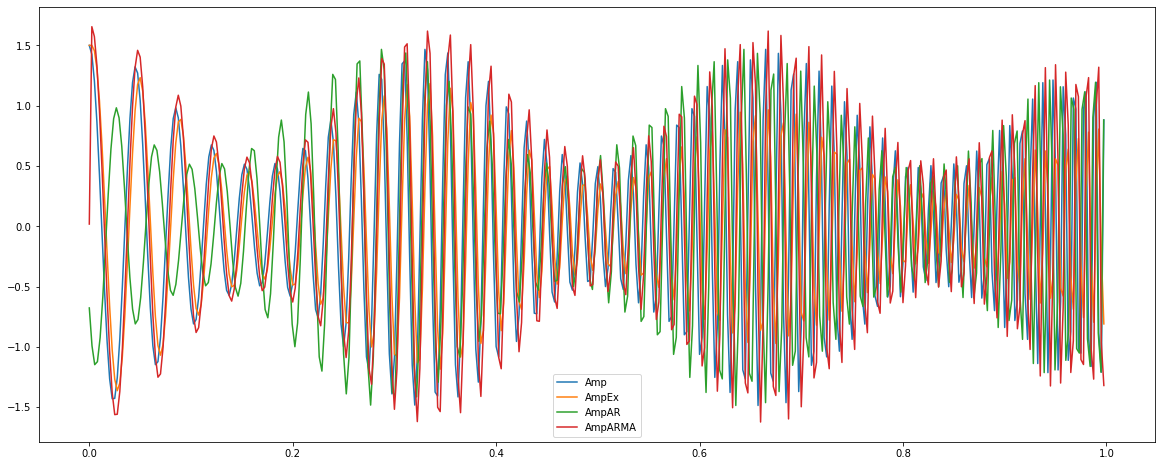

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(xAmp, yAmp, label="Amp")
plt.plot(xAmp, f_ex(yAmp), label="AmpEx")
plt.plot(LengArr(1,f_AR(yAmp)), f_AR(yAmp), label="AmpAR")
plt.plot(LengArr(1,f_ARMA(yAmp, 1,0)), f_ARMA(yAmp, 1, 0)*2, label="AmpARMA")
plt.legend()

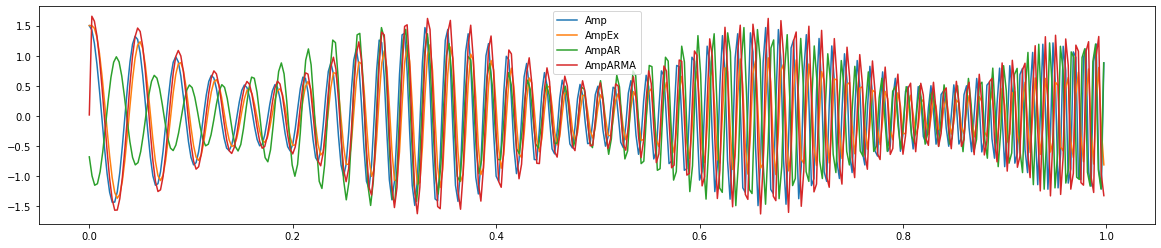

In [24]:
plt.figure(figsize=(20, 4))
plt.plot(xAmp, yAmp, label="Amp")
plt.plot(xAmp, f_ex(yAmp), label="AmpEx")
plt.plot(LengArr(1,f_AR(yAmp)), f_AR(yAmp), label="AmpAR")
plt.plot(LengArr(1,f_ARMA(yAmp, 1,0)), 2*f_ARMA(yAmp, 1, 0), label="AmpARMA")
plt.legend()

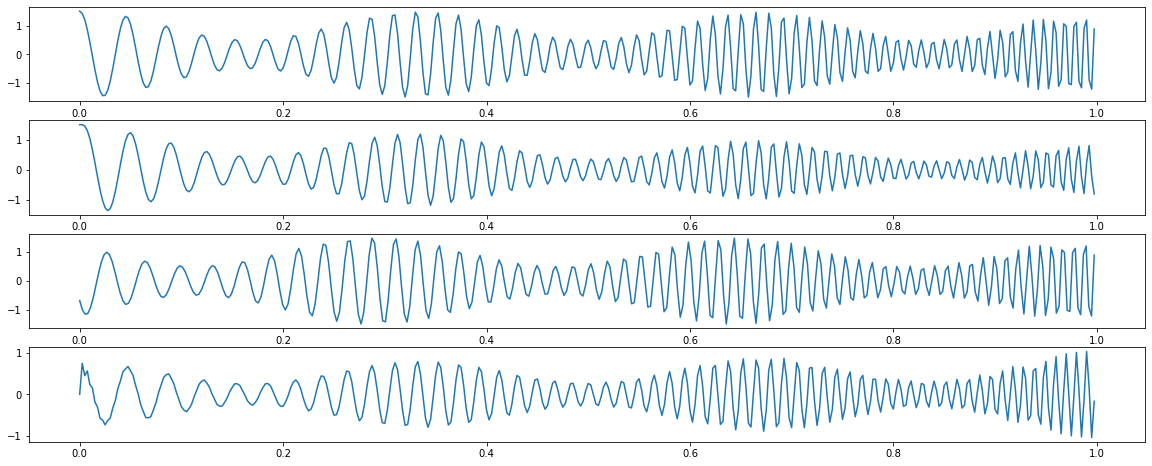

In [28]:
plt.figure(figsize=(20, 8))
xAmp, yAmp
plt.subplot(4, 1, 1)
plt.plot(xAmp, yAmp, label="Amp")
plt.subplot(4, 1, 2)
plt.plot(xAmp, f_ex(yAmp), label="AmpEx")
plt.subplot(4, 1, 3)
plt.plot(LengArr(1,f_AR(yAmp)), f_AR(yAmp), label="AmpAR")
plt.subplot(4, 1, 4)
plt.plot(LengArr(1,f_ARMA(yAmp, 0,1)), f_ARMA(yAmp, 0, 1), label="AmpARMA")
#plt.legend()

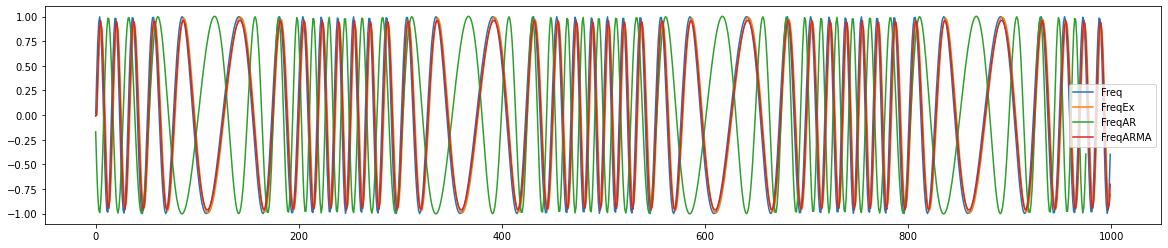

In [31]:
plt.figure(figsize=(20, 4))
plt.plot(yFreq, label="Freq")
plt.plot(f_ex(yFreq), label="FreqEx")
plt.plot(f_AR(yFreq), label="FreqAR")
plt.plot(f_ARMA(yFreq, 1, 0), label="FreqARMA")
plt.legend()

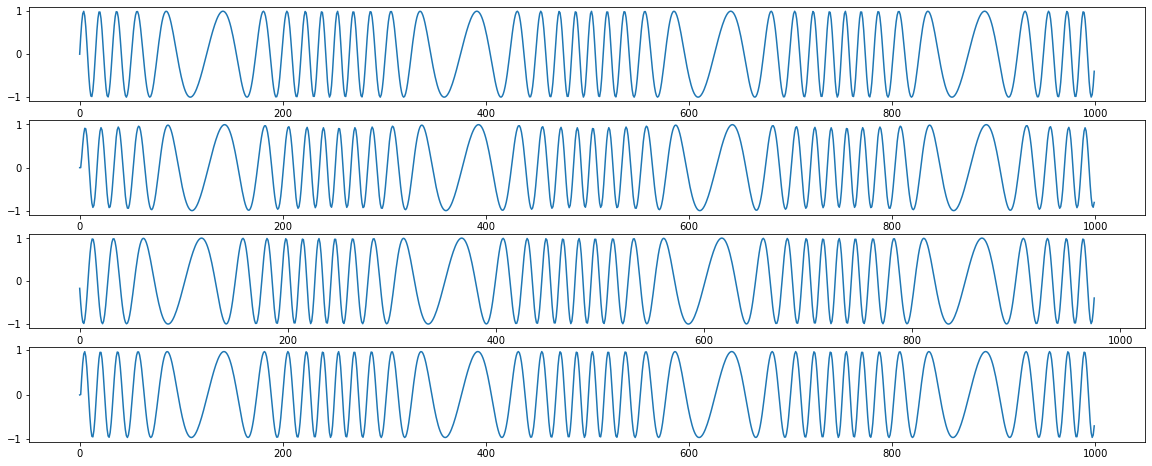

In [33]:
plt.figure(figsize=(20, 8))
#xAmp, yAmp
plt.subplot(4, 1, 1)
plt.plot(yFreq, label="Freq")
plt.subplot(4, 1, 2)
plt.plot( f_ex(yFreq), label="FreqEx")
plt.subplot(4, 1, 3)
plt.plot(f_AR(yFreq), label="FreqAR")
plt.subplot(4, 1, 4)
plt.plot(f_ARMA(yFreq, 1, 0), label="FreqARMA")